In [1]:
import tensorflow as tf


In [1]:
import numpy as np

#OLS
alpha = 1.0
beta = 2.0
sigma = 0.5
N = 10000
x = np.random.rand(N,)*0.3+0.1
y = alpha + beta*x + np.random.normal(size=x.shape)*sigma

In [4]:
import pymc3 as mc


In [8]:
with mc.Model() as model:
    alpha = mc.Normal('alpha', 0.0, sd=100)
    beta = mc.Normal('beta', 0.0, sd=100)
    sigma = mc.HalfCauchy('sigma', beta=10, testval=1.)
    likelihood = mc.Normal('y', mu=alpha+beta*x, sd=sigma, observed=y)
    
    start = mc.find_MAP() # Find starting value by optimization
    step = mc.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = mc.sample(2000, step, start=start, progressbar=False) # draw 2000 posterior samples using NUTS sampling


Optimization terminated successfully.
         Current function value: 7370.123044
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21


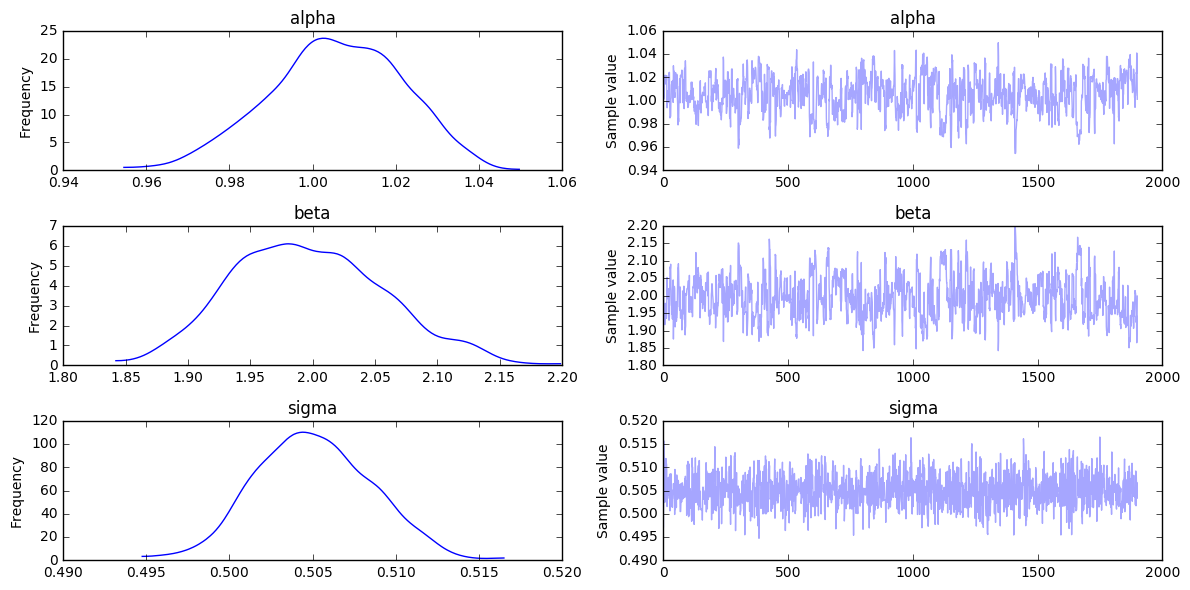

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7, 7))
mc.traceplot(trace[100:])
plt.tight_layout();


In [233]:
import numpy as np

# simulate data
N=10000
alpha0 = 0.0
sigma0 = 1.0
elas0 = 0.6
mu0 = 1.0

p = np.random.random((2,N))*0.7+0.7
expend = np.exp((1-elas0)*np.log(p) + alpha0 + np.random.normal(0.0, sigma0, (N,)))
convenience_expend = 2
convenience_cost = (np.random.random(choice.shape) < 0.3)*0.3
optimal_value = expend/(elas0-1) 
convenience_value = expend**(1/elas0)*convenience_expend**(1-1/elas0)*elas0/(elas0-1) - convenience_expend + convenience_cost
expend[optimal_value < convenience_value] = convenience_expend
value = np.maximum(optimal_value, convenience_value) + mu0*np.random.gumbel(size=expend.shape)
choice = np.argmax(value, axis = 0)

In [234]:
convenience_cost

array([ 0. ,  0. ,  0.3, ...,  0.3,  0. ,  0.3])

In [235]:
dvchoice = (choice == np.array([0,1]).reshape(2,1))
expendchoice = expend[choice, range(N)]
pchoice = p[choice, range(N)]

In [218]:
convenience_flag = np.abs(expendchoice - convenience_expend) < 1e-4

(array([ 0.39406149,  0.67866145,  0.60035436,  0.45047627,  0.3300686 ,
         0.20881891,  0.16756033,  0.51110112,  0.11703963,  0.08672721,
         0.07325502,  0.08335916,  0.06230887,  0.05557277,  0.04378461,
         0.0362065 ,  0.03115443,  0.03957455,  0.02441834,  0.02273432]),
 array([ 0.01690259,  0.26582984,  0.51475709,  0.76368434,  1.01261159,
         1.26153884,  1.5104661 ,  1.75939335,  2.0083206 ,  2.25724785,
         2.5061751 ,  2.75510235,  3.00402961,  3.25295686,  3.50188411,
         3.75081136,  3.99973861,  4.24866586,  4.49759312,  4.74652037,
         4.99544762]),
 <a list of 20 Patch objects>)

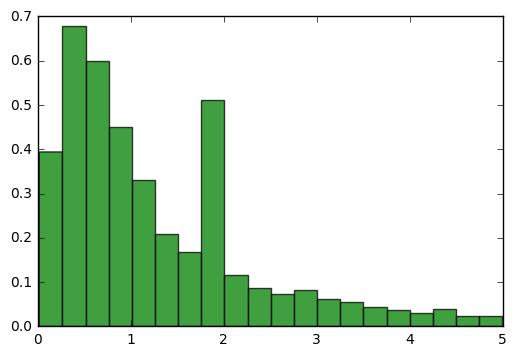

In [236]:
expend0 = expend[0]
plt.hist(expend0[(choice==0) & (expend0<5)], 20, normed=1, facecolor='green', alpha=0.75)

In [52]:
start

{'alpha': array(1.0059505300775586),
 'beta': array(1.9937917627750295),
 'sigma_log_': array(-0.6833253337512901)}

In [64]:
with mc.Model() as model:
    alpha = mc.Normal('alpha', 0.0, sd=100)
    elas = mc.HalfCauchy('elas', beta=10, testval=1.)
    sigma = mc.HalfCauchy('sigma', beta=10, testval=1.)
    
    lexpendchoice = mc.Normal('lexpendchoice', mu=(1-elas)*np.log(pchoice) + alpha, sd = sigma, observed = np.log(expendchoice))
    
    lexpend = np.log(expendchoice) + (1-elas)*(np.log(p) - np.log(pchoice))
    util = mc.math.exp(lexpend)/(elas-1)
    maxutil = util.max(axis=0)
    ldenom = maxutil + mc.math.logsumexp(util-maxutil,axis=0)
    lprobchoice = (util*dvchoice.astype(np.float64)).sum(axis=0) - ldenom
    ischoice = mc.Bernoulli('ischoice', mc.math.exp(lprobchoice), observed=np.ones(choice.shape))
    
#     start = mc.find_MAP() # Find starting value by optimization
    step = mc.NUTS(scaling={'alpha':0.0, 'elas_log_':np.log(0.6), 'sigma_log_':0.0}) # Instantiate MCMC sampling algorithm
    trace = mc.sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling


INFO (theano.gof.compilelock): Refreshing lock /home/dhlong/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock
100%|██████████| 2000/2000 [05:15<00:00, 16.69it/s]


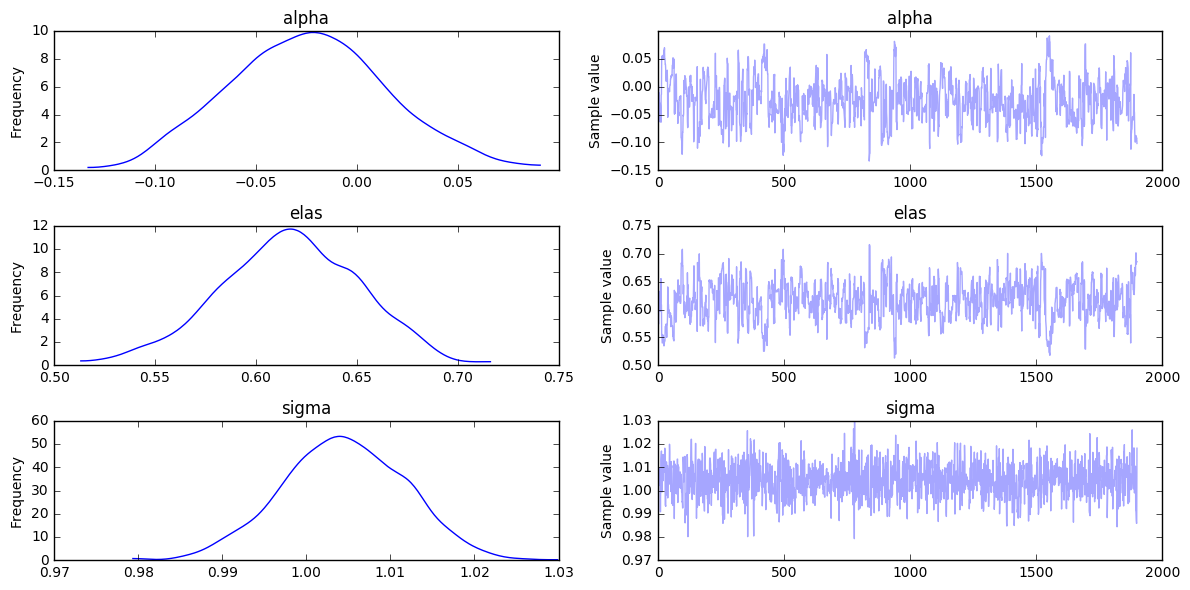

In [65]:
%matplotlib inline
plt.figure(figsize=(7, 7))
mc.traceplot(trace[100:])
plt.tight_layout();

In [44]:
choice.reshape((1,-1)).shape

(1, 10000)

In [33]:
choice.shape

(10000,)

In [ ]:
    mcchoice = mc.CategoricalGibbsMetropolis

In [ ]:
    ldemon = mc.math.logsumexp

In [ ]:
    maxutil = mc.math.maximum

In [ ]:
    maxutil = mc.math.maximum

In [7]:
eta = np.log(expendchoice) - (1-elas)*np.log(pchoice) - alpha
lexpend = np.log(expendchoice) + (1-elas)*(np.log(p)-np.log(pchoice))
util = T.exp(lexpend)/(elas-1)
maxutil = T.max(util,axis=0,keepdims=True)
ldenom = maxutil.squeeze() + T.log(T.sum(T.exp(util-maxutil),axis=0))
lprobchoice = T.sum(util*dvchoice,axis=0) - ldenom
likelihood = ((eta*eta).sum()/(2*T.exp(2*lsigma)) + lsigma*len(expendchoice)
              -lprobchoice.sum())
grad = T.grad(likelihood, theta)

In [8]:
theta0 = [np.log(0.6), 0.0, 1.0]

In [9]:
eval_f = theano.function([theta], likelihood)
eval_grad = theano.function([theta], grad)

In [10]:
pyipopt.set_loglevel(1)
thetahat , _, _, _, _, _ = pyipopt.fmin_unconstrained(
    eval_f,
    np.array([np.log(2.0), 0.0, 1.0]),
    fprime=eval_grad,
    fhess=None,
    )

lelashat = thetahat[0]
print np.exp(thetahat)
print eval_f(thetahat)

[ 0.63186405  0.96359085  0.99691841]
11627.1983372
